In [1]:
from datacube import Datacube
from datacube.utils import geometry
from mangrove_change_on_cyclone_with_tally import *
import pickle
dc = Datacube(env='NCI-test')
product = 'cyclone_windspeed'
query = {'output_crs': 'EPSG:3577', 'resolution':(25,-25), 'resampling': 'nearest'}
cyclone_name = {
    'Ingrid_Landfall2':'IngridLF2',
    'Laurence':'Laurence',
    'Lam':'Lam',
    'Ita':  'Ita',
    'Monica_Landfall1':'MonicaLF1',
    'Nathan_Landfall2':'NathanLF2',
    'Marcia': 'Marcia',
    'Nathan_Landfall1':'NathanLF1',
    'Ingrid_Landfall1': 'IngridLF1',
    'George':'George',
    'Larry':'Larry',
    'Yas':'Yasi',
    'Ingrid_Landfall3':'IngridLF3',
    'Monica_Landfall2':'MonicaLF2'
}

datasets = dc.find_datasets(product=product)
print(len(datasets))
datasets

ModuleNotFoundError: No module named 'mangrove_change_on_cyclone_with_tally'

In [2]:
dataset = datasets[13]
cname = cyclone_name[dataset.local_path.name.strip('.yaml')]
cname

'Yasi'

In [3]:
geobox = dataset.extent
geobox

Geometry(POLYGON ((146.895972222758 -17.069305555477,145.296805556065 -17.069305555477,145.296805556065 -19.6584722221854,146.895972222758 -19.6584722221854,146.895972222758 -17.069305555477)), GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]])

In [4]:
start_time = dataset.center_time
time_before_cyclone = (str(start_time.year - 1) + '-01-01', str(start_time.year - 1) + '-12-31')
time_before_cyclone

('2010-01-01', '2010-12-31')

In [5]:
time_after_cyclone = (str(start_time.year) + '-01-01', '2019-12-31')
time_after_cyclone

('2011-01-01', '2019-12-31')

In [6]:
bc_datasets = dc.find_datasets(product = 'mangrove_extent_cover_albers',time=time_before_cyclone, geopolygon=geobox)
bc_datasets

[Dataset <id=fac71e69-b4cf-4321-a7ce-5cd3467bdf9c type=mangrove_extent_cover_albers location=file:///g/data/v10/users/ea6141/mangrove_v2_notsure/MANGROVE_COVER/14_-22/MANGROVE_COVER_3577_14_-22_20100101.nc>,
 Dataset <id=965e3fd4-f0dd-4616-80a0-93d51a8025fd type=mangrove_extent_cover_albers location=file:///g/data/v10/users/ea6141/mangrove_v2_notsure/MANGROVE_COVER/15_-21/MANGROVE_COVER_3577_15_-21_20100101.nc>,
 Dataset <id=9fc245a3-e978-45e8-bcb8-47fdfce24909 type=mangrove_extent_cover_albers location=file:///g/data/v10/users/ea6141/mangrove_v2_notsure/MANGROVE_COVER/14_-20/MANGROVE_COVER_3577_14_-20_20100101.nc>,
 Dataset <id=197db31c-81bc-487c-a6e1-6501463ba39e type=mangrove_extent_cover_albers location=file:///g/data/v10/users/ea6141/mangrove_v2_notsure/MANGROVE_COVER/14_-21/MANGROVE_COVER_3577_14_-21_20100101.nc>,
 Dataset <id=11dd0eb1-dd91-4f18-afdf-17ba3dd1246f type=mangrove_extent_cover_albers location=file:///g/data/v10/users/ea6141/mangrove_v2_notsure/MANGROVE_COVER/15_-22/M

In [7]:
cyclone_extent = {}
k = 0
for d in bc_datasets:
    cyclone_extent[k] = d.extent
    k += 1
cyclone_extent

{0: Geometry(POLYGON ((1400000.0 -2105908.32201988,1400000 -2100000,1500000 -2100000,1500000 -2200000,1400000 -2200000,1400000.0 -2105908.32201988)), EPSG:3577),
 1: Geometry(POLYGON ((1500000.0 -2001491.08847501,1500000 -2000000,1600000 -2000000,1600000 -2100000,1500000 -2100000,1500000.0 -2001491.08847501)), EPSG:3577),
 2: Geometry(POLYGON ((1400000.0 -1983681.23578092,1400000 -1900000,1500000 -1900000,1500000 -2000000,1400000 -2000000,1400000.0 -1983681.23578092)), EPSG:3577),
 3: Geometry(POLYGON ((1400000.0 -2000274.6471692,1400000 -2000000,1500000 -2000000,1500000 -2100000,1400000 -2100000,1400000.0 -2000274.6471692)), EPSG:3577),
 4: Geometry(POLYGON ((1500000.0 -2169174.94429054,1500000 -2100000,1600000 -2100000,1600000 -2200000,1500000 -2200000,1500000.0 -2169174.94429054)), EPSG:3577),
 5: Geometry(POLYGON ((1400000.0 -1829302.73973189,1400000 -1800000,1500000 -1800000,1500000 -1900000,1400000 -1900000,1400000.0 -1829302.73973189)), EPSG:3577)}

In [8]:
bc_datasets = dc.group_datasets(bc_datasets, group_by='time')
ac_datasets = dc.find_datasets(product = 'mangrove_extent_cover_albers',time=time_after_cyclone, geopolygon=geobox)
ac_datasets = dc.group_datasets(ac_datasets, group_by='time')
cyclone_datasets = dc.group_datasets([dataset], group_by='time')
print(bc_datasets)


<xarray.DataArray (time: 1)>
array([(Dataset <id=11dd0eb1-dd91-4f18-afdf-17ba3dd1246f type=mangrove_extent_cover_albers location=file:///g/data/v10/users/ea6141/mangrove_v2_notsure/MANGROVE_COVER/15_-22/MANGROVE_COVER_3577_15_-22_20100101.nc>, Dataset <id=197db31c-81bc-487c-a6e1-6501463ba39e type=mangrove_extent_cover_albers location=file:///g/data/v10/users/ea6141/mangrove_v2_notsure/MANGROVE_COVER/14_-21/MANGROVE_COVER_3577_14_-21_20100101.nc>, Dataset <id=965e3fd4-f0dd-4616-80a0-93d51a8025fd type=mangrove_extent_cover_albers location=file:///g/data/v10/users/ea6141/mangrove_v2_notsure/MANGROVE_COVER/15_-21/MANGROVE_COVER_3577_15_-21_20100101.nc>, Dataset <id=9fc245a3-e978-45e8-bcb8-47fdfce24909 type=mangrove_extent_cover_albers location=file:///g/data/v10/users/ea6141/mangrove_v2_notsure/MANGROVE_COVER/14_-20/MANGROVE_COVER_3577_14_-20_20100101.nc>, Dataset <id=c14e2a85-b768-43ff-8c67-f40595f873b4 type=mangrove_extent_cover_albers location=file:///g/data/v10/users/ea6141/mangrove_v2

In [31]:
d = ac_datasets.data[0][0]

In [37]:
d.measurements

{'canopy_cover_class': {'layer': 'canopy_cover_class', 'path': ''},
 'extent': {'layer': 'extent', 'path': ''}}

In [9]:
wind_cat_full = None
all_wind_cat_full = None
for key, value in cyclone_extent.items():
    loading_polygon = value.intersection(geobox.to_crs(value.crs))
    loading_box = geometry.GeoBox.from_geopolygon(loading_polygon, resolution=(25, -25))
    wind_cat, all_wind_cat = damage_level_by_geo(dc, 'cyclone_damage_results_v2', cname, 
                                             cyclone_datasets, bc_datasets, ac_datasets, 
                                             loading_box, windspeed_category, dump=False)
    if wind_cat_full is None:
        wind_cat_full = wind_cat
        all_wind_cat_full = all_wind_cat
    else:
        wind_cat_full += wind_cat
        all_wind_cat_full += all_wind_cat
    print(wind_cat_full)
    print(all_wind_cat_full)

          0         1         2        3         4
C1        0         0         0        0         0
C2        0         0         0        0         0
C3  7.37688      2.59  0.013125  0.00625  0.021875
C4    0.185  0.135625         0   0.0025  0.000625
C5        0         0         0        0         0
          1         2         3         4         5
C1        0         0         0         0         0
C2        0         0         0         0         0
C3  2.92063  0.738125  0.164375  0.000625  0.003125
C4  0.11875   0.03375   0.00375  0.001875         0
C5        0         0         0         0         0
          0         1         2        3         4
C1        0         0         0        0         0
C2        0         0         0        0         0
C3  7.37688      2.59  0.013125  0.00625  0.021875
C4    0.185  0.135625         0   0.0025  0.000625
C5        0         0         0        0         0
          1         2         3         4         5
C1        0         0   

In [10]:
with open(cname+'_tally.pkl', 'wb') as f:
    pickle.dump((wind_cat_full, all_wind_cat_full), f)

In [11]:
with open(cname+'_tally.pkl', 'rb') as f:
    wind_cat_full, all_wind_cat_full = pickle.load(f)

In [10]:
wind_cat_full

,0,1,2,3,4
C1,6.00875,1.56063,0.006875,0.035,0.0375
C2,4.73563,1.01375,0.00125,0.005,0.031875
C3,64.6088,33.115,0.904375,0.216875,0.601875
C4,80.4475,138.901,32.8756,0.30875,3.6925
C5,0.443125,2.80375,3.455,0.033125,1.36375


Text(0.5,0,'Wind speed categories')

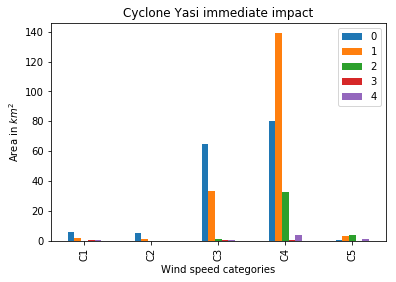

In [12]:
figure_a = wind_cat_full.astype('float').plot(kind='bar', title='Cyclone Yasi immediate impact')
figure_a.set_ylabel('Area in $km^2$')
figure_a.set_xlabel('Wind speed categories')

Text(0.5,0,'Wind speed categories')

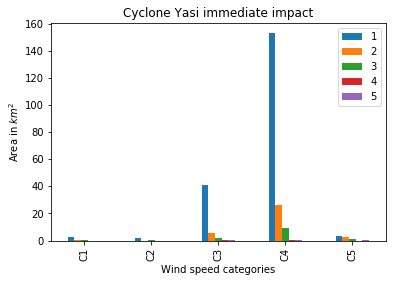

In [14]:
figure_a = all_wind_cat_full.astype('float').plot(kind='bar', title='Cyclone Yasi immediate impact')
figure_a.set_ylabel('Area in $km^2$')
figure_a.set_xlabel('Wind speed categories')